### Logistic Regression Model --

Importing of Packages--

In [1]:
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error

Read the data file--

In [2]:
def read_data():
    path="C:/top mentor data sci assignmets/4 jun/4. Logistic Regresssion"
    filename="/bank-full.csv"
    data=pd.read_csv(path+filename,encoding="utf-8",delimiter=";")
    return data

print("Calling read_data function--")
data=read_data()
print(data)
print(data.shape)

Calling read_data function--
       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day 

Checking for missing values--

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<AxesSubplot:>

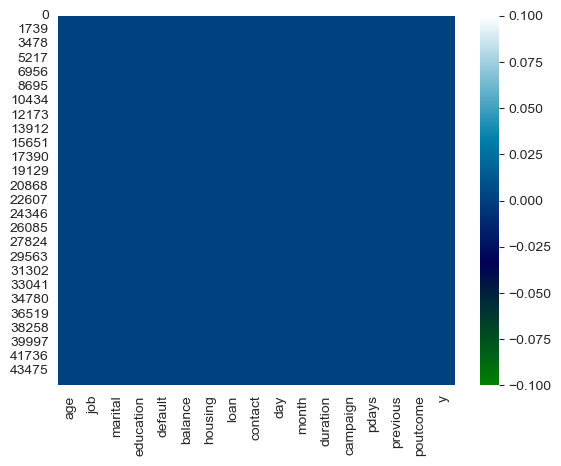

In [3]:
print(data.isnull().sum())
sns.heatmap(data.isnull(),cmap="ocean")

Print basic info about data--

In [4]:
print(data.columns)
print("==========================")
print("Data types---")
print(data.dtypes)
print("==========================")

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
Data types---
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


Insights of data--

In [5]:
print("1.Total no of clients--",len(data))
print("2.Average age of client in the bank is--",round(data["age"].mean()))
print("3.Clients works in these areas--",data["job"].unique())
print('4.Clients are either,',data["marital"].unique())
print('5.No of clients having credit in default--',len(data[data['default']=='yes']))
print("6.Average yearly balance of the client in the bank is €",data["balance"].mean())
print('7.Number of clients having housing loan--',len(data[data['housing']=='yes']))
print('8.Number of clients having personal loan--',len(data[data['loan']=='yes']))
print("9.Highest no of contacts performed during this marketing campaign for any client--",data["campaign"].max())
print("10.Highest no of contacts performed before this marketing campaign for any client--",data["previous"].max())
print("11.Types of outcomes from previous marketing campaign",data["poutcome"].unique())
print("12.Percentage of successful outcomes from previous marketing campaigns",(len(data[data['poutcome']=='success'])/45211)*100,"%")

1.Total no of clients-- 45211
2.Average age of client in the bank is-- 41
3.Clients works in these areas-- ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
4.Clients are either, ['married' 'single' 'divorced']
5.No of clients having credit in default-- 815
6.Average yearly balance of the client in the bank is € 1362.2720576850766
7.Number of clients having housing loan-- 25130
8.Number of clients having personal loan-- 7244
9.Highest no of contacts performed during this marketing campaign for any client-- 63
10.Highest no of contacts performed before this marketing campaign for any client-- 275
11.Types of outcomes from previous marketing campaign ['unknown' 'failure' 'other' 'success']
12.Percentage of successful outcomes from previous marketing campaigns 3.34210700935613 %


In [6]:
data=data.rename({"default":"credit","loan":'personal',"y":'deposit'},axis=1)
print(data.head(2))

   age         job  marital  education credit  balance housing personal  \
0   58  management  married   tertiary     no     2143     yes       no   
1   44  technician   single  secondary     no       29     yes       no   

   contact  day month  duration  campaign  pdays  previous poutcome deposit  
0  unknown    5   may       261         1     -1         0  unknown      no  
1  unknown    5   may       151         1     -1         0  unknown      no  


Exploratory Data Analysis--<br>
Checking for outliers--

Text(0.5, 1.0, 'Age v/s Deposit')

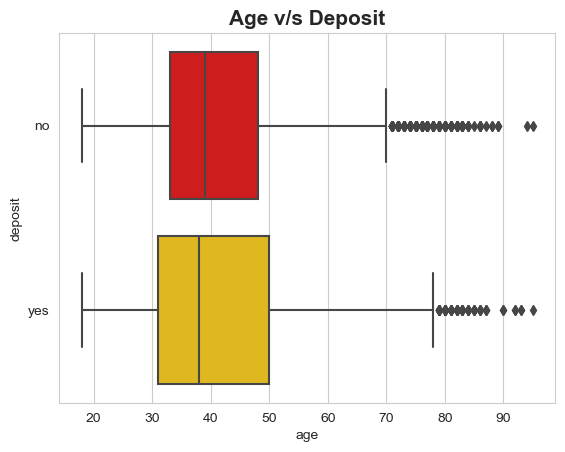

In [7]:
sns.boxplot(x="age",y="deposit",data=data,palette="hot")
plt.title("Age v/s Deposit",weight="bold",fontsize=15)

Our target variable 'deposit' represents whether the client has subscribed a term deposit or not.<br> From the above boxplot, we can observe that <br>
1.Age column is showing outliers but age of clients can vary.<br>
2.Apperently,there are more clients between 30-50 age group who have subscribed to the term deposit than those who have not.

Text(0.5, 1.0, 'Balance v/s Deposit')

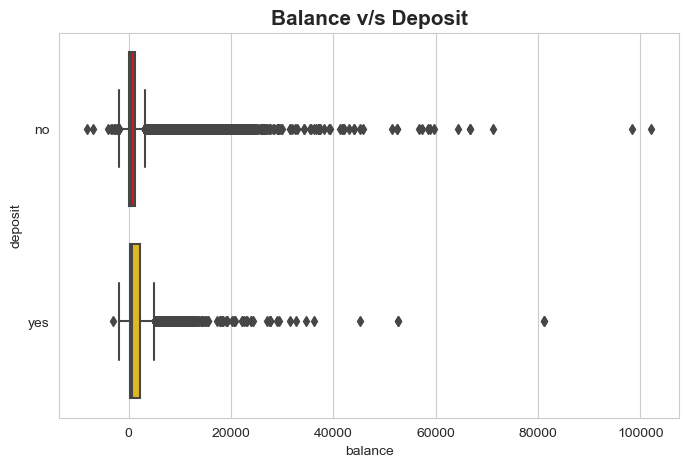

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(x="balance",y="deposit",data=data,palette="hot")
plt.title("Balance v/s Deposit",weight="bold",fontsize=15)

Balance column represents average yearly balance of each client in Euros.<br>
1.Balance column is showing outliers however balance of clients can vary.<br>
2.From above boxplot we can't make any conclusive remarks about relation between balance and deposit but we can say that may be those who have subscribed to the term deposit have a bit more balance.

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


Text(0, 0.5, 'Jobs')

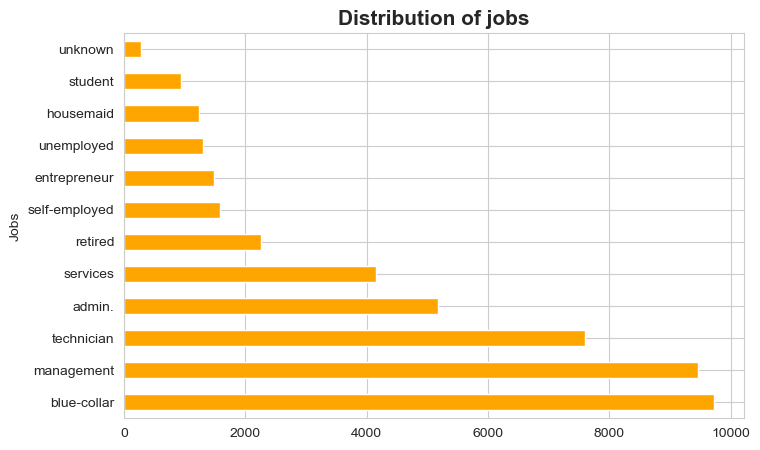

In [9]:
plt.figure(figsize=(8,5))
print(data["job"].value_counts())
data["job"].value_counts().plot(kind='barh',color="orange")
plt.title("Distribution of jobs",weight="bold",fontsize=15)
plt.ylabel('Jobs')

More clients are doing blue-collar jobs furthermore there are less number of students.

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


Text(0.5, 1.0, 'Distribution of Marital status')

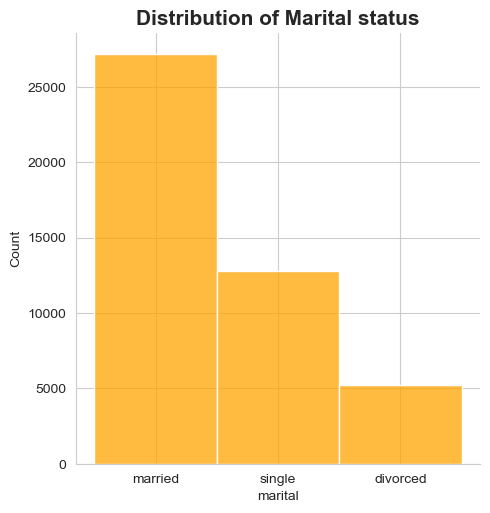

In [10]:
sns.displot(x="marital",data=data,color="orange")
print(data["marital"].value_counts())
plt.title("Distribution of Marital status",weight="bold",fontsize=15)

Majority of clients are married.

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


Text(0.5, 1.0, 'Distribution of Educational status')

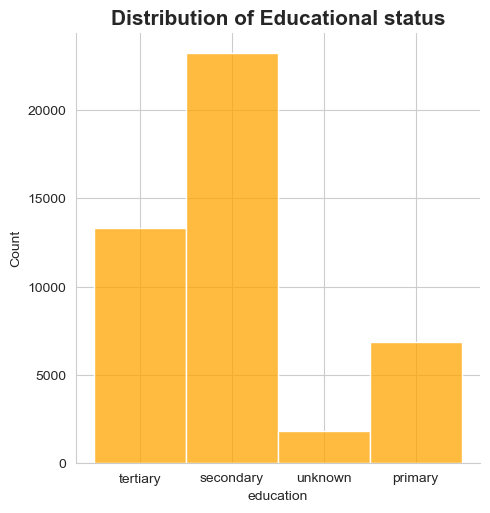

In [11]:
sns.displot(x="education",data=data,color="orange")
print(data["education"].value_counts())
plt.title("Distribution of Educational status",weight="bold",fontsize=15)

Most clients have received secondary education.

Text(0.5, 1.0, 'Distribution of clients having credit')

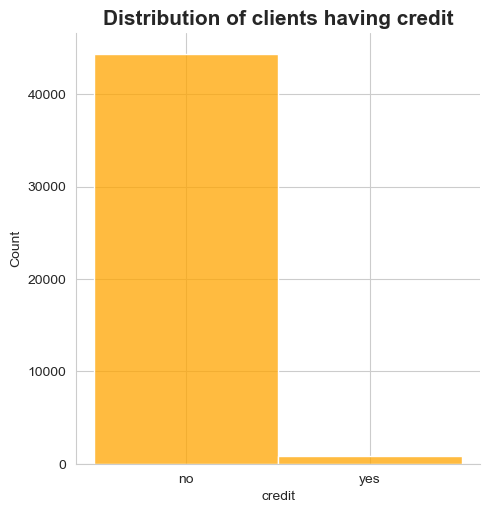

In [12]:
sns.displot(x="credit",data=data,color="orange")
plt.title("Distribution of clients having credit",weight="bold",fontsize=15)

Fewer clients has credit in default.

Text(0.5, 1.0, 'Balance v/s Deposit')

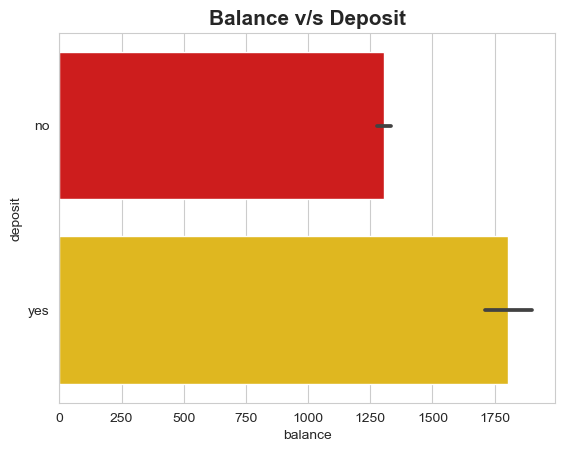

In [13]:
sns.barplot(y="deposit",x="balance",data=data,palette="hot")
plt.title("Balance v/s Deposit",fontweight='bold',fontsize=15)

From above barplot,we can note that average balance of clients subscribed to the term deposit is around € 1800,<br>which is higher than those who have not subscribed as their average balance ranges upto € 1300.

yes    25130
no     20081
Name: housing, dtype: int64


Text(0.5, 1.0, 'Distribution of Clients having Housing Loan')

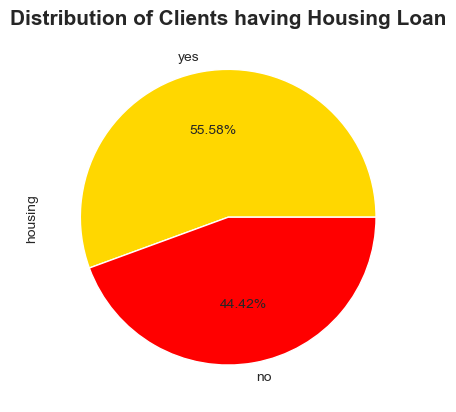

In [14]:
data["housing"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["gold",'r'])
print(data["housing"].value_counts())
plt.title("Distribution of Clients having Housing Loan",fontweight='bold',fontsize=15)

More than 50% of clients has taken housing loan.

no     37967
yes     7244
Name: personal, dtype: int64


Text(0.5, 1.0, 'Distribution of Clients having Personal Loan')

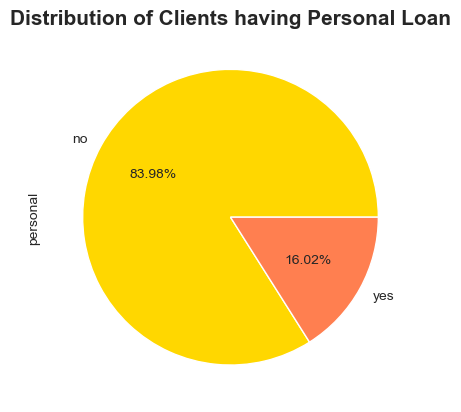

In [15]:
data["personal"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["gold",'coral'])
print(data["personal"].value_counts())
plt.title("Distribution of Clients having Personal Loan",fontweight='bold',fontsize=15)

Roughly,16% of clients have taken personal loan.

Text(0.5, 1.0, 'Distribution of Communication types')

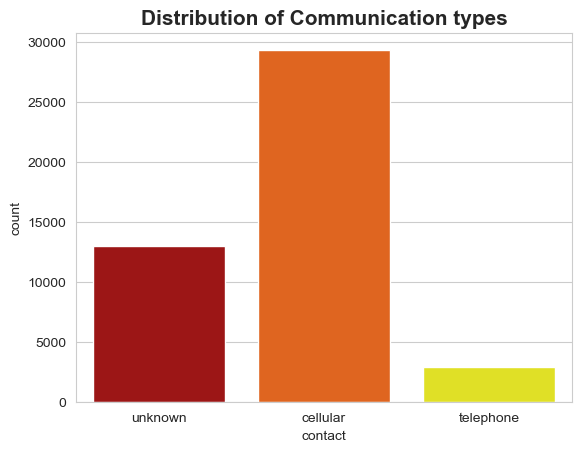

In [16]:
sns.countplot(x='contact',data=data,palette="hot")
plt.title("Distribution of Communication types",fontweight='bold',fontsize=15)

Most clients were contacted by cell during campaign.

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64


Text(0.5, 1.0, 'Distribution of Last contacted month')

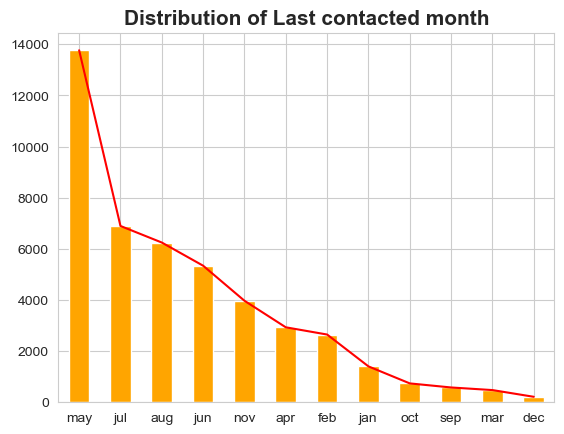

In [17]:
data["month"].value_counts().plot(kind="bar",color="orange")
data["month"].value_counts().plot(color="r")
print(data["month"].value_counts())
plt.title("Distribution of Last contacted month",fontweight='bold',fontsize=15)

Majority of clients were last contacted in the month of May.

2.763840658246887


Text(0, 0.5, 'No of clients')

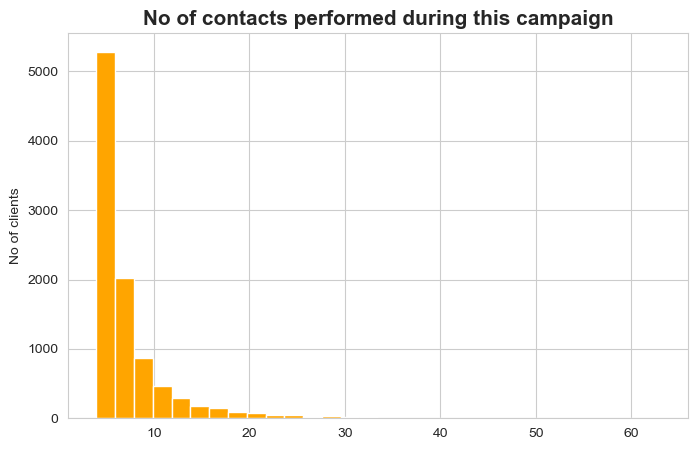

In [18]:
plt.figure(figsize=(8,5))
data[data['campaign'] > 3]['campaign'].hist(bins=30,color="orange")
print(data["campaign"].mean())
plt.title("No of contacts performed during this campaign",fontweight='bold',fontsize=15)
plt.ylabel("No of clients")

More than 5000 clients were contacted 3 or more number of times during this campaign.

0.5803233726305546


Text(0, 0.5, 'No of clients')

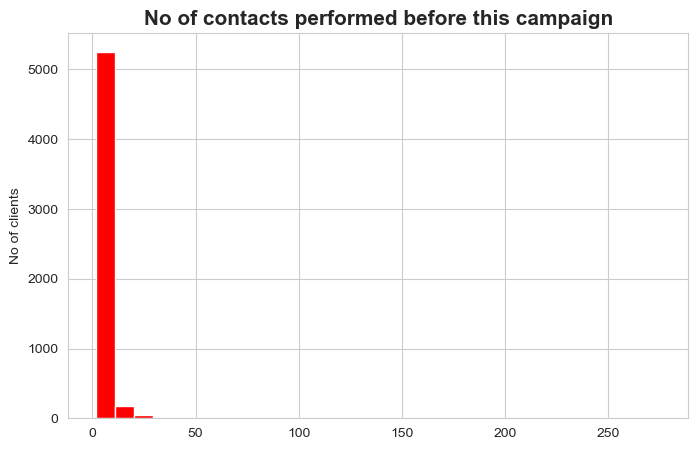

In [19]:
plt.figure(figsize=(8,5))
data[data['previous'] > 1]['previous'].hist(bins=30,color="r")
print(data["previous"].mean())
plt.title("No of contacts performed before this campaign",fontweight='bold',fontsize=15)
plt.ylabel("No of clients")

More than 5000 clients were contacted 1 or more number of times before this campaign.

Text(0.5, 1.0, 'Outcome of previous marketing campaign')

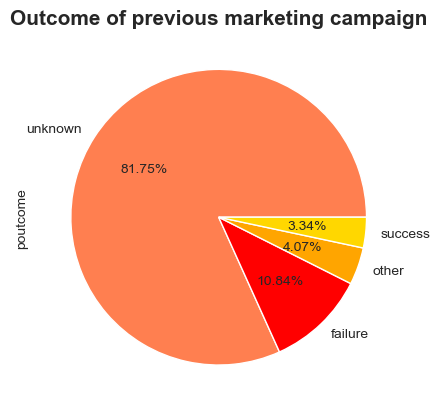

In [20]:
data["poutcome"].value_counts().plot(kind="pie",autopct='%.2f%%',colors=["coral",'r',"orange","gold"])
plt.title("Outcome of previous marketing campaign",fontweight='bold',fontsize=15)

Precise success rate for previous marketing campaign is around 3.34 %.

no     39922
yes     5289
Name: deposit, dtype: int64


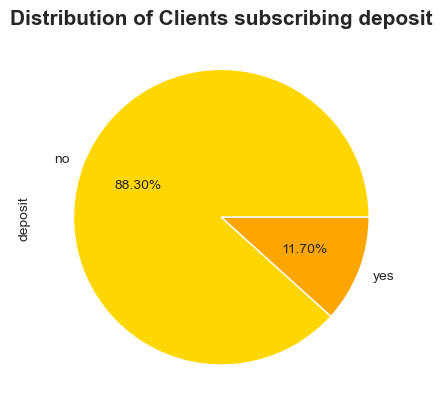

In [21]:
plt.title("Distribution of Clients subscribing deposit",fontweight='bold',fontsize=15)
data["deposit"].value_counts().plot(kind="pie",colors=["gold","orange"],autopct='%.2f%%')
print(data["deposit"].value_counts())

Only,11.70% of clients have subscribed to the term deposit.

### Plotting Clients who have subscribed a term deposit--

Average age-- 41.670069956513515
Average balance-- 1804.2679145396105
Average number of contacts performed during this campaign-- 2.1410474569861977
Average number of contacts performed before this campaign-- 1.1703535640007563


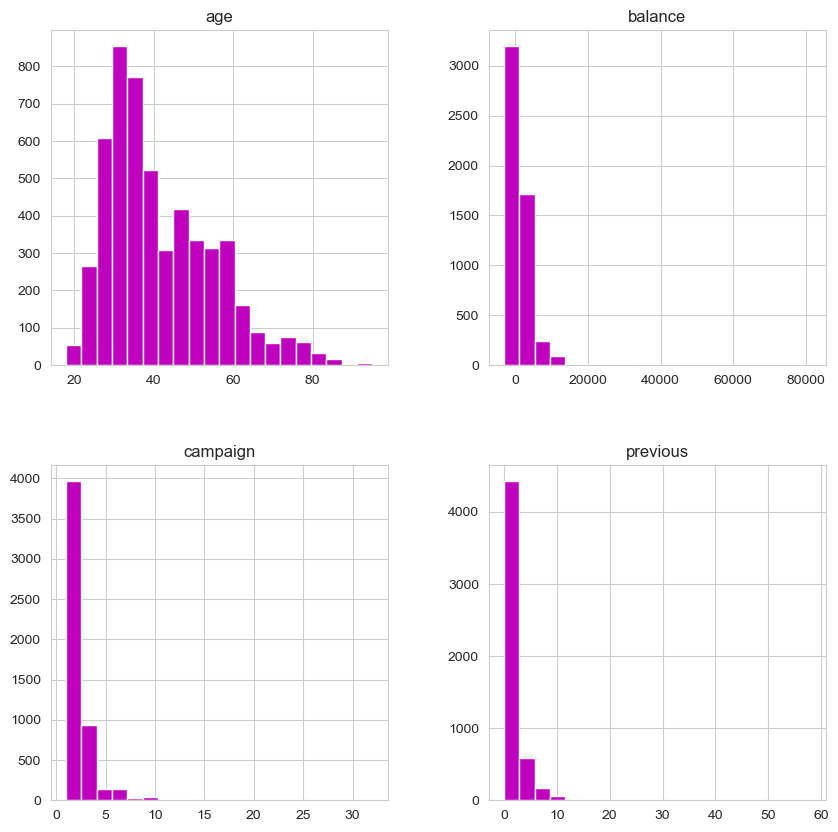

In [22]:
data[data["deposit"]=="yes"][["age",'balance','campaign','previous']].hist(figsize=(10,10),color="m",bins=20)
print("Average age--",data[data["deposit"]=="yes"]["age"].mean())
print("Average balance--",data[data["deposit"]=="yes"]["balance"].mean())
print("Average number of contacts performed during this campaign--",data[data["deposit"]=="yes"]["campaign"].mean())
print("Average number of contacts performed before this campaign--",data[data["deposit"]=="yes"]["previous"].mean())

### Plotting Clients who have  not subscribed a term deposit--

Average age-- 40.83898602274435
Average balance-- 1303.7149691899203
Average number of contacts performed during this campaign-- 2.8463503832473322
Average number of contacts performed before this campaign-- 0.5021542006913481


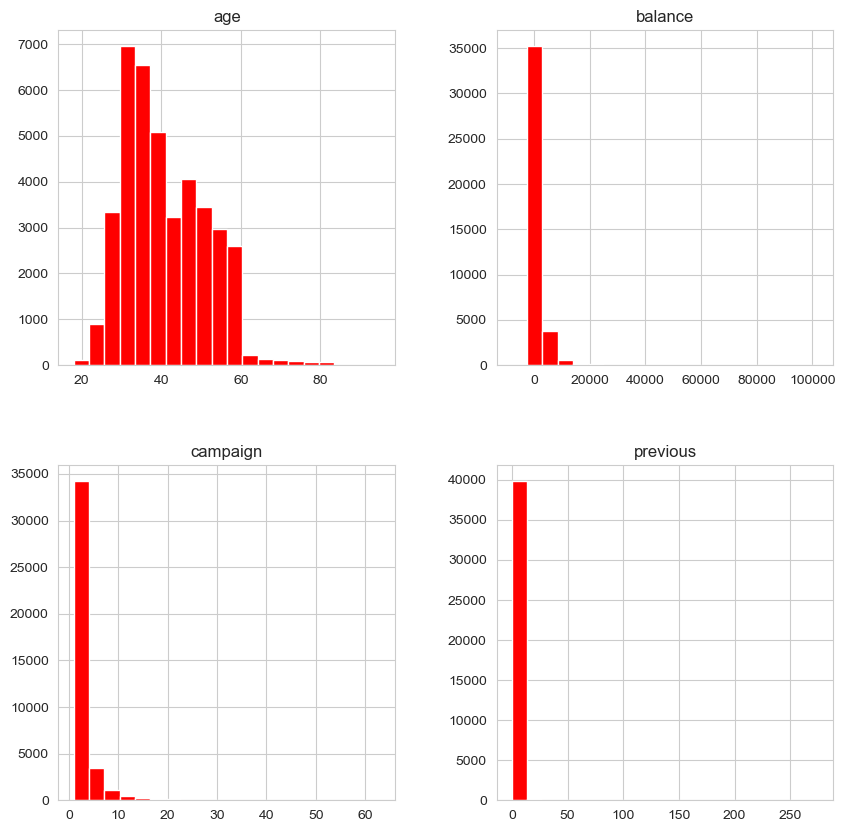

In [23]:
data[data["deposit"]=="no"][["age",'balance','campaign','previous']].hist(figsize=(10,10),color="r",bins=20)
print("Average age--",data[data["deposit"]=="no"]["age"].mean())
print("Average balance--",data[data["deposit"]=="no"]["balance"].mean())
print("Average number of contacts performed during this campaign--",data[data["deposit"]=="no"]["campaign"].mean())
print("Average number of contacts performed before this campaign--",data[data["deposit"]=="no"]["previous"].mean())

In [24]:
data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

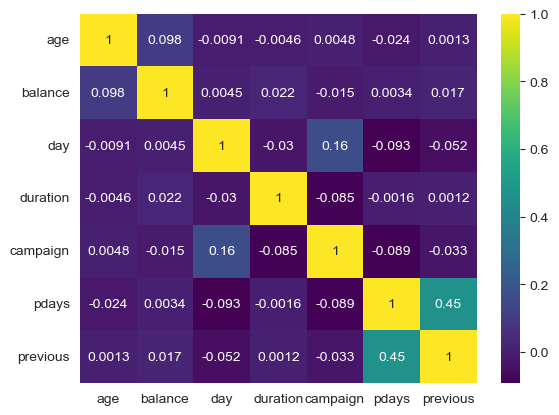

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

Converting categorical variables into dummy/indicator variables--

In [26]:
df=pd.get_dummies(data,columns=['job','marital','education','contact','poutcome','month'])
df.head(2)

,age,credit,balance,housing,personal,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


Fitting Label encoder--

In [27]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df['credit']=lb.fit_transform(df['credit'])
df['housing']=lb.fit_transform(df['housing'])
df['personal']=lb.fit_transform(df['personal'])
df['deposit']=lb.fit_transform(df['deposit'])
pd.set_option("display.max.columns",None)
df.head(2)

,age,credit,balance,housing,personal,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0


In [28]:
df.columns

Index(['age', 'credit', 'balance', 'housing', 'personal', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'deposit', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'contact_unknown', 'poutcome_failure', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')

## "Building a model--"

#### We have to predict whether the client has subscribed a term deposit or not--

Calling train_test function--
(36168, 48)
(36168,)
(9043, 48)
(9043,)
Calling modelling function--
Model training is completed
Calling prediction function--
[0 0 0 ... 0 0 0]
*********************************************
Confusion_matrix--
[[7813  183]
 [ 690  357]]


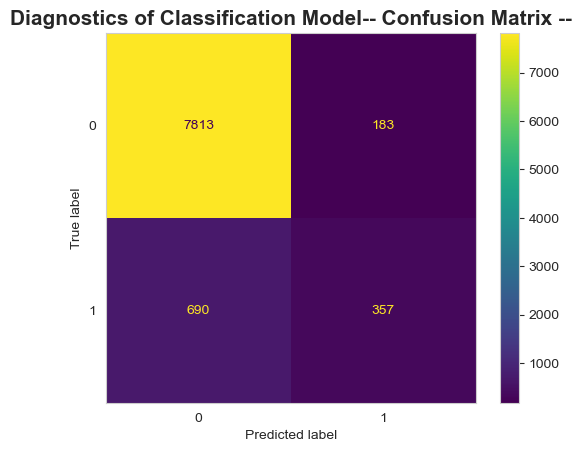

*********************************************
Accuracy score-- 90.346
Misclassification-- 0.09653875926130706
Classification Report--
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7996
           1       0.66      0.34      0.45      1047

    accuracy                           0.90      9043
   macro avg       0.79      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043



In [29]:
from sklearn.linear_model import LogisticRegression
X=pd.concat([df.iloc[:,0:10],df.iloc[:,11:]],axis=1)
y=df.iloc[:,10]
def train_test(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1234)
    print(X_train.shape),print(y_train.shape)
    print(X_test.shape),print(y_test.shape)
    return X_train,X_test,y_train,y_test
print("Calling train_test function--")
X_train,X_test,y_train,y_test=train_test(X,y)

def modelling(X_train,y_train,X_test):
    model=LogisticRegression(max_iter=5000)
    model_train=model.fit(X_train,y_train)
    print("Model training is completed")
    return model_train
print("Calling modelling function--")
model_train=modelling(X_train,y_train,X_test)

def prediction(X_test):
    pred=model_train.predict(X_test)
    return pred
print("Calling prediction function--")
pred=prediction(X_test)
print(pred)
print("*********************************************")

from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay,classification_report
result=confusion_matrix(y_test,pred)
print("Confusion_matrix--")
print(result)
ConfusionMatrixDisplay(result,display_labels=model_train.classes_).plot()
plt.title("Diagnostics of Classification Model-- Confusion Matrix --",fontweight="bold",fontsize=15)
plt.grid(False)
plt.show()
print("*********************************************")

accuracy_score(y_test,pred)
1-accuracy_score(y_test,pred)
classification_report(y_test,pred)
print("Accuracy score--",round(accuracy_score(y_test,pred)*100,3))
print( "Misclassification--",1-accuracy_score(y_test,pred))
print("Classification Report--")
print(classification_report(y_test,pred))

Our Logistic Regression model gave us accuracy of 90.34%.